### Multiple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df_index = pd.read_csv("multidata.csv")
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [4]:
# Drop unnecessary colums
df_index.drop(columns=["year", "month"], axis=1, inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
# Check for nulls
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

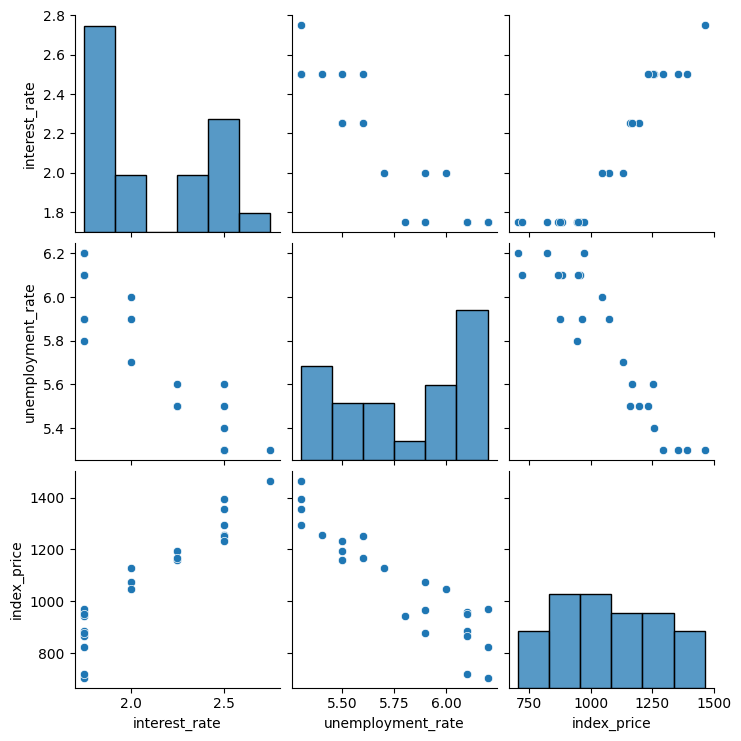

In [6]:
sns.pairplot(df_index)

In [7]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

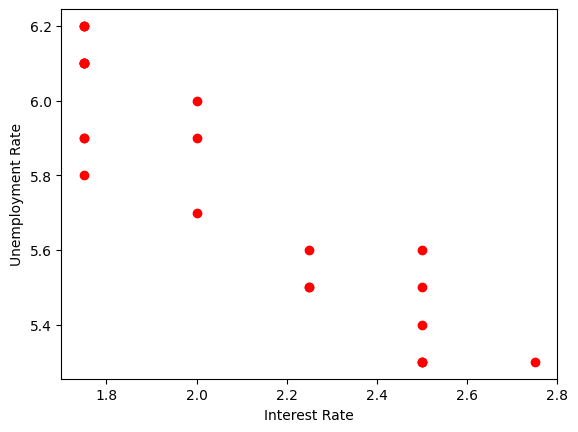

In [8]:
# Visualise the data
plt.scatter(df_index["interest_rate"], df_index["unemployment_rate"], color="r")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

## Get Independent and Dependent Features

In [ ]:
# X = df_index[["interest_rate"], ["unemplyment_rate"]]
# y = df_index["index_price"]
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [11]:
# Train, Test, Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

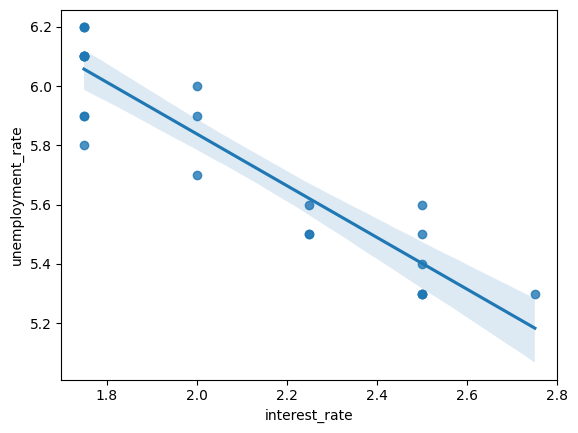

In [13]:
sns.regplot(x=df_index["interest_rate"], y=df_index["unemployment_rate"])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [16]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
from sklearn.model_selection import cross_val_score
validationScore = cross_val_score(regression, X_train, y_train, scoring="neg_mean_squared_error", cv=3)

In [19]:
np.mean(validationScore)

np.float64(-5914.828180162386)

In [20]:
yPredict = regression.predict(X_test)

In [31]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
# Mean Squared Error
mse = mean_squared_error(y_test, yPredict)
# Mean Absolute Error
mae = mean_absolute_error(y_test, yPredict)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MSE: 8108.567426306604
MAE: 73.80444932337097
RMSE: 90.04758423359621


In [24]:
from sklearn.metrics import r2_score

In [25]:
score = r2_score(y_test, yPredict)
print(f"R2 Score: {score}")

R2 Score: 0.7591371539010257


In [26]:
adjusted_score = 1 - (1-score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f"Adjusted R2 Score: {adjusted_score}")

Adjusted R2 Score: 0.5985619231683761


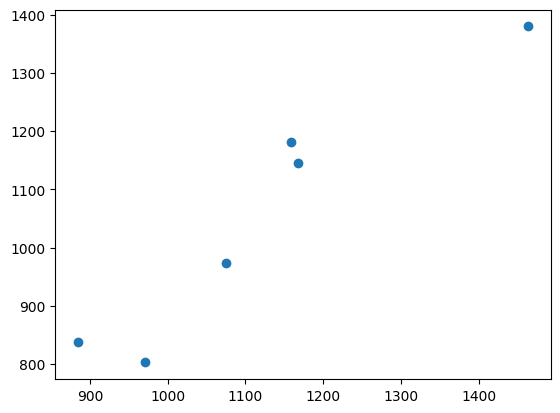

In [27]:
plt.scatter(y_test, yPredict)

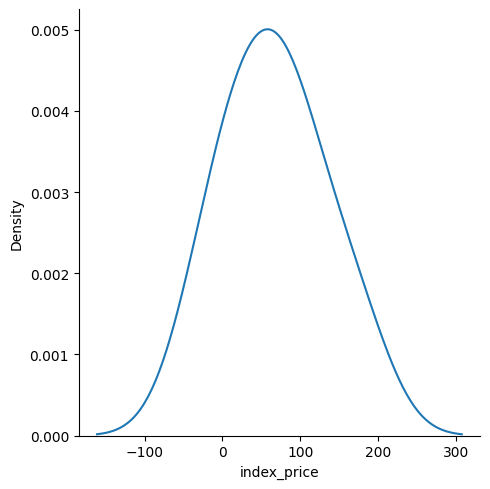

In [29]:
residuals = y_test - yPredict
sns.displot(residuals, kind="kde")

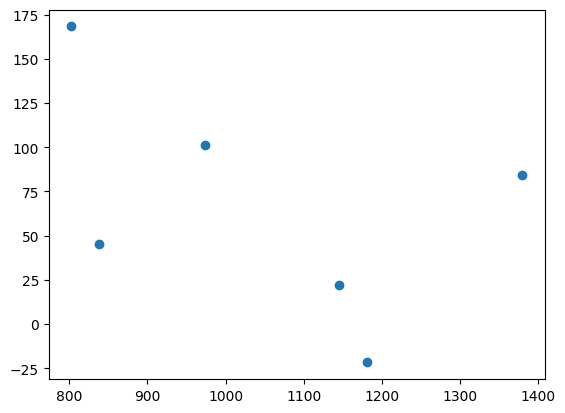

In [30]:
plt.scatter(yPredict, residuals)

## OLS

In [32]:
import statsmodels.api as sm

In [33]:
model = sm.OLS(y_train, X_train).fit()

In [34]:
ols_pred = model.predict(X_test)
print(f"OLS Prediction: {ols_pred}")

OLS Prediction: [ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [ ]:
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                       0.754
Time:                        15:47:09   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\Developement\Udemy course Python\Simple Linear Regression\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
